# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Wyoming/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Wyoming/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/NRCS_-_Conservation_Districts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/NRCS_-_Conservation_Districts.zip', compression=dict(method='zip', archive_name='NRCS_-_Conservation_Districts.csv'), index=False)

# Realign Geometry Projection
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(dfin1))
dfin1.head()

35


,OBJECTID,entityname,District,Office,County,CountyCode,PhoneNum,Office_ID,Shape_Leng,Shape_Area,CNSVDSTR,geometry,WaDEUUID
0,1,Campbell County Conservation,Campbell County CD,Gillette Service Center,Campbell,005,307-682-8843,66904,680079.19278,24212040527.80907,Campbell County CD,"POLYGON ((-106.01896 43.71191, -106.01887 43.7...",re0
1,2,Clear Creek Conservation,Lake De Smet CD,Buffalo Service Center,Johnson,019,307-684-2526,66928,492838.49438,11462600418.56535,Lake De Smet CD,"POLYGON ((-107.3718 44.55729, -107.37138 44.55...",re1
2,3,Cody Conservation,Powell - Clarks Fork CD,Powell Service Center,Park,029,307-754-9301,66943,1018393.37491,25328296430.75972,Cody CD,"POLYGON ((-111.0563 44.85824, -111.05624 44.86...",re2
3,4,Converse County Conservation,Converse County CD,Douglas Service Center,Converse,009,307-358-3050,66910,646404.76547,20650547614.46943,Converse County CD,"POLYGON ((-106.07852 43.49082, -106.07845 43.4...",re3
4,5,Crook County Natural Resource,Crook County NRD,Sundance Service Center,Crook,011,307-283-2870,66913,488860.90977,14660110606.46379,Crook County NRD,"POLYGON ((-105.08952 44.90938, -105.08943 44.9...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "2023"
df['in_Year'] = "9/26/2023"

# Organization Info
df['in_OrganizationUUID'] = "WYov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["entityname"]
df['in_ReportingUnitNativeID'] = "wy" + dfin1["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Conservation Districts"
df['in_ReportingUnitUpdateDate'] = "7/30/2023"
df['in_StateCV'] = "WY"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Wyoming Association of Conservation Districts"
df['in_RegulatoryDescription'] = "Selects conservation policy priorities which are used to develop and review environmental and natural resources legislation and to secure adequate federal funding for natural resources conservation programs."
df['in_RegulatoryName'] = dfin1["entityname"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = "3/1/1941"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Conservation District"
df['in_WaterSourceTypeCV'] = "Surface and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

35


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,2023,9/26/2023,WYov_O1,4326,Campbell County Conservation,wy1,,Conservation Districts,7/30/2023,WY,"POLYGON ((-106.01896 43.71191, -106.01887 43.7...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Campbell County Conservation,1,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
1,re1,2023,9/26/2023,WYov_O1,4326,Clear Creek Conservation,wy2,,Conservation Districts,7/30/2023,WY,"POLYGON ((-107.3718 44.55729, -107.37138 44.55...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Clear Creek Conservation,2,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
2,re2,2023,9/26/2023,WYov_O1,4326,Cody Conservation,wy3,,Conservation Districts,7/30/2023,WY,"POLYGON ((-111.0563 44.85824, -111.05624 44.86...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Cody Conservation,3,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
3,re3,2023,9/26/2023,WYov_O1,4326,Converse County Conservation,wy4,,Conservation Districts,7/30/2023,WY,"POLYGON ((-106.07852 43.49082, -106.07845 43.4...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Converse County Conservation,4,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
4,re4,2023,9/26/2023,WYov_O1,4326,Crook County Natural Resource,wy5,,Conservation Districts,7/30/2023,WY,"POLYGON ((-105.08952 44.90938, -105.08943 44.9...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Crook County Natural Resource,5,Active,,,3/1/1941,,Conservation District,Surface and Groundwater


## Overlay Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

35


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Campbell County Conservation', 'Clear Creek Conservation',
       'Cody Conservation', 'Converse County Conservation',
       'Crook County Natural Resource', 'Dubois-Crowheart Conservation',
       'Hot Springs Conservation', 'Laramie County Conservation',
       'Laramies River Conservation', 'Lincoln Conservation',
       'Lingle-Ft. Laramie Conservation',
       'Little Snake River Conservation', 'Lower Wind River Conservation',
       'Medicine Bow Conservation', 'Meeteetse Conservation',
       'Natrona County Conservation', 'Niobrara Conservation',
       'North Platte Conservation', 'Platte County Resource',
       'Popo Agie Conservation', 'Powder River Conservation',
       'Powell-Clarks Fork Conservation',
       'Saratoga-Encampment-Rawlins Conservation',
       'Sheridan County Conservation', 'Shoshone Conservation',
       'South Big Horn Conservation', 'South Goshen Conservation',
       'Star Valley Conservation', 'Sublette County Conservation',
       'Sweetwa

In [9]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Selects conservation policy priorities which are used to develop and review environmental and natural resources legislation and to secure adequate federal funding for natural resources conservation programs.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Campbell County Conservation', 'Clear Creek Conservation',
       'Cody Conservation', 'Converse County Conservation',
       'Crook County Natural Resource', 'Dubois-Crowheart Conservation',
       'Hot Springs Conservation', 'Laramie County Conservation',
       'Laramies River Conservation', 'Lincoln Conservation',
       'Lingle-Ft. Laramie Conservation',
       'Little Snake River Conservation', 'Lower Wind River Conservation',
       'Medicine Bow Conservation', 'Meeteetse Conservation',
       'Natrona County Conservation', 'Niobrara Conservation',
       'North Platte Conservation', 'Platte County Resource',
       'Popo Agie Conservation', 'Powder River Conservation',
       'Powell-Clarks Fork Conservation',
       'Saratoga-Encampment-Rawlins Conservation',
       'Sheridan County Conservation', 'Shoshone Conservation',
       'South Big Horn Conservation', 'South Goshen Conservation',
       'Star Valley Conservation', 'Sublette County Conservation',
       'Sweetwa

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1941-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [12]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

35


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,re0,2023,9/26/2023,WYov_O1,4326,Campbell County Conservation,wy1,,Conservation Districts,7/30/2023,WY,"POLYGON ((-106.01896 43.71191, -106.01887 43.7...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Campbell County Conservation,1,Active,,,1941-03-01,,Conservation District,Surface and Groundwater,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,re1,2023,9/26/2023,WYov_O1,4326,Clear Creek Conservation,wy2,,Conservation Districts,7/30/2023,WY,"POLYGON ((-107.3718 44.55729, -107.37138 44.55...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Clear Creek Conservation,2,Active,,,1941-03-01,,Conservation District,Surface and Groundwater,"POLYGON ((-107.3718 44.55729, -107.37138 44.55..."
2,re2,2023,9/26/2023,WYov_O1,4326,Cody Conservation,wy3,,Conservation Districts,7/30/2023,WY,"POLYGON ((-111.0563 44.85824, -111.05624 44.86...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Cody Conservation,3,Active,,,1941-03-01,,Conservation District,Surface and Groundwater,"POLYGON ((-111.0563 44.85824, -111.05624 44.86..."
3,re3,2023,9/26/2023,WYov_O1,4326,Converse County Conservation,wy4,,Conservation Districts,7/30/2023,WY,"POLYGON ((-106.07852 43.49082, -106.07845 43.4...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Converse County Conservation,4,Active,,,1941-03-01,,Conservation District,Surface and Groundwater,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,re4,2023,9/26/2023,WYov_O1,4326,Crook County Natural Resource,wy5,,Conservation Districts,7/30/2023,WY,"POLYGON ((-105.08952 44.90938, -105.08943 44.9...",Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Crook County Natural Resource,5,Active,,,1941-03-01,,Conservation District,Surface and Groundwater,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


<Axes: >

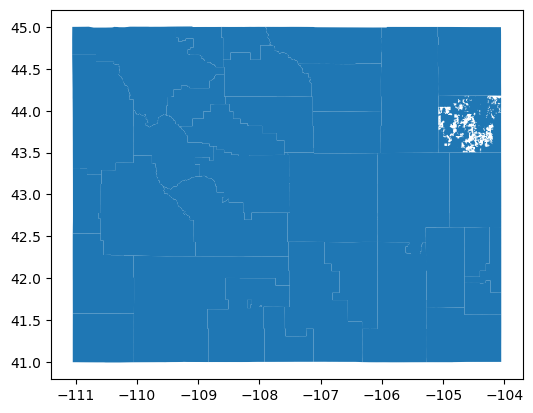

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

35


,in_ReportingUnitNativeID,geometry
0,wy1,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,wy2,"POLYGON ((-107.3718 44.55729, -107.37138 44.55..."
2,wy3,"POLYGON ((-111.0563 44.85824, -111.05624 44.86..."
3,wy4,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,wy5,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


#### Overlay Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Geometry DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

35


,in_ReportingUnitNativeID,geometry
0,wy1,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,wy2,"POLYGON ((-107.3718 44.55729, -107.37138 44.55..."
2,wy3,"POLYGON ((-111.0563 44.85824, -111.05624 44.86..."
3,wy4,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,wy5,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


## Export Data

In [18]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        35 non-null     object        
 1   in_Date                         35 non-null     object        
 2   in_Year                         35 non-null     object        
 3   in_OrganizationUUID             35 non-null     object        
 4   in_EPSGCodeCV                   35 non-null     object        
 5   in_ReportingUnitName            35 non-null     object        
 6   in_ReportingUnitNativeID        35 non-null     object        
 7   in_ReportingUnitProductVersion  35 non-null     object        
 8   in_ReportingUnitTypeCV          35 non-null     object        
 9   in_ReportingUnitUpdateDate      35 non-null     object        
 10  in_StateCV                      35 non-null     object        
 11  in_Overs

In [19]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,2023,9/26/2023,WYov_O1,4326,Campbell County Conservation,wy1,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Campbell County Conservation,1,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
1,re1,2023,9/26/2023,WYov_O1,4326,Clear Creek Conservation,wy2,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Clear Creek Conservation,2,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
2,re2,2023,9/26/2023,WYov_O1,4326,Cody Conservation,wy3,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Cody Conservation,3,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
3,re3,2023,9/26/2023,WYov_O1,4326,Converse County Conservation,wy4,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Converse County Conservation,4,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
4,re4,2023,9/26/2023,WYov_O1,4326,Crook County Natural Resource,wy5,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Crook County Natural Resource,5,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
5,re5,2023,9/26/2023,WYov_O1,4326,Dubois-Crowheart Conservation,wy6,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Dubois-Crowheart Conservation,6,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
6,re6,2023,9/26/2023,WYov_O1,4326,Hot Springs Conservation,wy7,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Hot Springs Conservation,7,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
7,re7,2023,9/26/2023,WYov_O1,4326,Laramie County Conservation,wy8,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Laramie County Conservation,8,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
8,re8,2023,9/26/2023,WYov_O1,4326,Laramies River Conservation,wy9,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Laramies River Conservation,9,Active,,,1941-03-01,,Conservation District,Surface and Groundwater
9,re9,2023,9/26/2023,WYov_O1,4326,Lincoln Conservation,wy10,,Conservation Districts,7/30/2023,WY,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Lincoln Conservation,10,Active,,,1941-03-01,,Conservation District,Surface and Groundwater


In [20]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  35 non-null     object  
 1   geometry                  35 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 692.0+ bytes


In [21]:
goutdf

,in_ReportingUnitNativeID,geometry
0,wy1,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,wy2,"POLYGON ((-107.3718 44.55729, -107.37138 44.55..."
2,wy3,"POLYGON ((-111.0563 44.85824, -111.05624 44.86..."
3,wy4,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,wy5,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."
5,wy6,"POLYGON ((-110.05383 43.90196, -110.0538 43.90..."
6,wy7,"POLYGON ((-109.31323 43.81215, -109.31317 43.8..."
7,wy8,"POLYGON ((-105.2807 41.39498, -105.27789 41.39..."
8,wy9,"POLYGON ((-106.32343 41.12065, -106.32342 41.1..."
9,wy10,"POLYGON ((-111.04733 42.29268, -111.04731 42.3..."


In [22]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.